In [161]:
import time
import sqlite3
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


GECKODRIVER_PATH = r'C:\Users\Batia\Downloads\geckodriver-v0.34.0-win64\geckodriver.exe'


conn = sqlite3.connect('cars1.db')
cursor = conn.cursor()


cursor.execute('''
    CREATE TABLE IF NOT EXISTS car_listings (
        brand TEXT, model TEXT, price TEXT, seller TEXT, location TEXT, phone TEXT,
        registration_year TEXT, mileage TEXT, engine TEXT, fuel_type TEXT, body_type TEXT,
        doors TEXT, transmission TEXT, color TEXT, tech_check TEXT, wheel_size TEXT,
        seats TEXT, co2_emission TEXT
    )
''')

# Initialize WebDriver function
def initialize_driver():
    service = Service(GECKODRIVER_PATH)
    options = FirefoxOptions()
    options.add_argument('--incognito')
    options.add_argument('--headless')
    return webdriver.Firefox(service=service, options=options)

# Start driver
driver = initialize_driver()


df = pd.read_csv('autoplius_listings.csv')


MULTI_WORD_BRANDS = ["Land Rover", "Alfa Romeo", "Aston Martin", "Rolls Royce"]

def extract_brand_and_model(full_title):
    """Extracts the brand and model correctly, handling multi-word brands."""
    words = full_title.split(',')[0].split(' ')
    possible_brand = ' '.join(words[:2])

    if possible_brand in MULTI_WORD_BRANDS:
        brand = possible_brand
        model = ' '.join(words[2:])
    else:
        brand = words[0]
        model = ' '.join(words[1:])

    return brand, model

def scrape_data(url):
    global driver  # Declare global to modify the outer 'driver' variable

    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'page-title')))

        
        full_title = driver.find_element(By.CLASS_NAME, 'page-title').find_element(By.TAG_NAME, 'h1').text
        brand, model = extract_brand_and_model(full_title)

        
        price = driver.find_element(By.CLASS_NAME, 'price').text.strip()

        
        seller = driver.find_element(By.CLASS_NAME, 'seller-contact-name').text.strip()
        location = driver.find_element(By.CLASS_NAME, 'seller-contact-location').text.strip()
        phone = driver.find_element(By.CLASS_NAME, 'js-phone-number').get_attribute('data-clipboard-text')

        
        def safe_find_parameter(label):
            try:
                param_element = driver.find_element(
                    By.XPATH, f"//div[contains(., '{label}')]/following-sibling::div"
                )
                return param_element.text.strip()
            except:
                return ''  

        
        registration_year = safe_find_parameter('Pirma registracija')
        mileage = safe_find_parameter('Rida')
        engine = safe_find_parameter('Variklis')
        fuel_type = safe_find_parameter('Kuro tipas')
        body_type = safe_find_parameter('Kėbulo tipas')
        doors = safe_find_parameter('Durų skaičius')
        transmission = safe_find_parameter('Pavarų dėžė')
        color = safe_find_parameter('Spalva')
        tech_check = safe_find_parameter('Tech. apžiūra iki')
        wheel_size = safe_find_parameter('Ratlankių skersmuo')
        seats = safe_find_parameter('Sėdimų vietų skaičius')
        co2_emission = safe_find_parameter('CO₂ emisija, g/km')

        
        cursor.execute('''
            INSERT INTO car_listings (
                brand, model, price, seller, location, phone,
                registration_year, mileage, engine, fuel_type, body_type,
                doors, transmission, color, tech_check, wheel_size,
                seats, co2_emission
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (brand, model, price, seller, location, phone,
              registration_year, mileage, engine, fuel_type, body_type,
              doors, transmission, color, tech_check, wheel_size,
              seats, co2_emission))

        conn.commit()
        print(f"Successfully scraped {url}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        driver.quit()  # Close the driver and restart it
        time.sleep(2)
        driver = initialize_driver()  # Re-initialize the driver


for index, row in df.iterrows():
    scrape_data(row['Link'])


cursor.close()
conn.close()
driver.quit()


Successfully scraped https://autoplius.lt/skelbimai/bmw-428-gran-coupe-2-0-l-kupe-coupe-2015-benzinas-26837939.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-530-2-0-l-sedanas-2019-benzinas-26808537.html
Successfully scraped https://autoplius.lt/skelbimai/volkswagen-golf-1-6-l-universalas-2014-dyzelinas-26842557.html
Successfully scraped https://autoplius.lt/skelbimai/fiat-500x-2-4-l-visureigis-krosoveris-2016-benzinas-dujos-26862175.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-320-gran-turismo-2-0-l-hecbekas-2016-dyzelinas-26830873.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-320-2-0-l-universalas-2020-dyzelinas-26852143.html
Successfully scraped https://autoplius.lt/skelbimai/mazda-cx-5-2-0-l-visureigis-krosoveris-2017-benzinas-26740367.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-520-2-0-l-universalas-2006-dyzelinas-26806059.html
Successfully scraped https://autoplius.lt/skelbimai/volkswagen-amarok-2-0-l-pikapas-2014-dyze

WebDriverException: Message: Process unexpectedly closed with status 0


In [162]:
import time
import sqlite3
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


GECKODRIVER_PATH = r'C:\Users\Batia\Downloads\geckodriver-v0.34.0-win64\geckodriver.exe'


conn = sqlite3.connect('cars1.db')
cursor = conn.cursor()


cursor.execute('''
    CREATE TABLE IF NOT EXISTS car_listings (
        brand TEXT, model TEXT, price TEXT, seller TEXT, location TEXT, phone TEXT,
        registration_year TEXT, mileage TEXT, engine TEXT, fuel_type TEXT, body_type TEXT,
        doors TEXT, transmission TEXT, color TEXT, tech_check TEXT, wheel_size TEXT,
        seats TEXT, co2_emission TEXT
    )
''')


def initialize_driver():
    service = Service(GECKODRIVER_PATH)
    options = FirefoxOptions()
    options.add_argument('--incognito')
    options.add_argument('--headless')
    return webdriver.Firefox(service=service, options=options)

# Start driver
driver = initialize_driver()


df = pd.read_csv('autoplius_listings.csv')


MULTI_WORD_BRANDS = ["Land Rover", "Alfa Romeo", "Aston Martin", "Rolls Royce"]

def extract_brand_and_model(full_title):
    """Extracts the brand and model correctly, handling multi-word brands."""
    words = full_title.split(',')[0].split(' ')
    possible_brand = ' '.join(words[:2])

    if possible_brand in MULTI_WORD_BRANDS:
        brand = possible_brand
        model = ' '.join(words[2:])
    else:
        brand = words[0]
        model = ' '.join(words[1:])

    return brand, model

def scrape_data(url):
    global driver  # Declare global to modify the outer 'driver' variable

    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'page-title')))

        
        full_title = driver.find_element(By.CLASS_NAME, 'page-title').find_element(By.TAG_NAME, 'h1').text
        brand, model = extract_brand_and_model(full_title)

        
        price = driver.find_element(By.CLASS_NAME, 'price').text.strip()

        
        seller = driver.find_element(By.CLASS_NAME, 'seller-contact-name').text.strip()
        location = driver.find_element(By.CLASS_NAME, 'seller-contact-location').text.strip()
        phone = driver.find_element(By.CLASS_NAME, 'js-phone-number').get_attribute('data-clipboard-text')

        
        def safe_find_parameter(label):
            try:
                param_element = driver.find_element(
                    By.XPATH, f"//div[contains(., '{label}')]/following-sibling::div"
                )
                return param_element.text.strip()
            except:
                return ''  

        
        registration_year = safe_find_parameter('Pirma registracija')
        mileage = safe_find_parameter('Rida')
        engine = safe_find_parameter('Variklis')
        fuel_type = safe_find_parameter('Kuro tipas')
        body_type = safe_find_parameter('Kėbulo tipas')
        doors = safe_find_parameter('Durų skaičius')
        transmission = safe_find_parameter('Pavarų dėžė')
        color = safe_find_parameter('Spalva')
        tech_check = safe_find_parameter('Tech. apžiūra iki')
        wheel_size = safe_find_parameter('Ratlankių skersmuo')
        seats = safe_find_parameter('Sėdimų vietų skaičius')
        co2_emission = safe_find_parameter('CO₂ emisija, g/km')

        
        cursor.execute('''
            INSERT INTO car_listings (
                brand, model, price, seller, location, phone,
                registration_year, mileage, engine, fuel_type, body_type,
                doors, transmission, color, tech_check, wheel_size,
                seats, co2_emission
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (brand, model, price, seller, location, phone,
              registration_year, mileage, engine, fuel_type, body_type,
              doors, transmission, color, tech_check, wheel_size,
              seats, co2_emission))

        conn.commit()
        print(f"Successfully scraped {url}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        driver.quit()  # Close the driver and restart it
        time.sleep(2)
        driver = initialize_driver()  # Re-initialize the driver

# Function to find the starting point in the CSV
def find_start_index(df, start_url):
    try:
        return df[df['Link'] == start_url].index[0]
    except IndexError:
        print(f"Start URL {start_url} not found in CSV.")
        return None


start_url = "https://autoplius.lt/skelbimai/bmw-x3-2-0-l-visureigis-krosoveris-2006-benzinas-26811501.html"
start_index = find_start_index(df, start_url)

if start_index is not None:
    
    for index, row in df.iloc[start_index:].iterrows():
        scrape_data(row['Link'])


cursor.close()
conn.close()
driver.quit()


Successfully scraped https://autoplius.lt/skelbimai/bmw-x3-2-0-l-visureigis-krosoveris-2006-benzinas-26811501.html
Successfully scraped https://autoplius.lt/skelbimai/opel-insignia-2-0-l-universalas-2014-dyzelinas-26851443.html
Successfully scraped https://autoplius.lt/skelbimai/fiat-punto-evo-1-3-l-hecbekas-2012-dyzelinas-26872229.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-120-2-0-l-hecbekas-2007-dyzelinas-26715439.html
Successfully scraped https://autoplius.lt/skelbimai/ford-c-max-1-6-l-vienaturis-2010-dyzelinas-26814417.html
Successfully scraped https://autoplius.lt/skelbimai/citroen-c5-1-6-l-universalas-2009-dyzelinas-26872009.html
Successfully scraped https://autoplius.lt/skelbimai/mercedes-benz-e270-2-7-l-universalas-2003-dyzelinas-26616233.html
Successfully scraped https://autoplius.lt/skelbimai/nissan-note-1-6-l-hecbekas-2006-benzinas-26765901.html
Successfully scraped https://autoplius.lt/skelbimai/citroen-c4-1-6-l-hecbekas-2011-dyzelinas-26732505.html
Succes

In [165]:
import csv

result = []
# use `with` so the file gets closed
with open('autoplius_listings.csv', 'r') as f:
    # no need for `list` here
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        # no need for `set([...])`, just `set(...)`
        unique_row_items = set(field.strip().lower() for field in row)
        for item in unique_row_items:
            if item not in result:
                result.append(item)
print(len(result))

4670


In [ ]:
with open('autoplius_listings.csv', 'r') as f:
    
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        if row 

In [82]:
import sqlite3
import pandas as pd


db_path = 'cars1.db'
conn = sqlite3.connect(db_path)


query = "SELECT * FROM car_listings"
df = pd.read_sql_query(query, conn)


conn.close()


print(df.head()) 


        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³, 252 AG (185kW) 

In [3]:
dfc = df.drop_duplicates(keep='last')
df1 = pd.DataFrame(dfc)
print(len(df1) , len(df))

3726 6193


In [137]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('cars1.db')
df = pd.read_sql_query("SELECT * FROM car_listings", conn)
conn.close()


df = df.drop_duplicates()

print(df.head())


        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³, 252 AG (185kW) 

In [6]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('cars1.db')
df = pd.read_sql_query("SELECT * FROM car_listings", conn)
conn.close()
df = df.drop_duplicates()

def clean_and_convert(column, unit):
    return pd.to_numeric(
        df[column].str.replace(unit, '', regex=True).str.replace(' ', ''), 
        errors='coerce'
    )


df['price'] = clean_and_convert('price', '€')
df['mileage'] = clean_and_convert('mileage', 'km')


df = df.dropna(subset=['price', 'mileage'])


print(df.head())


        brand             model  price               seller  \
0         BMW    428 Gran Coupe  18000  Privatus pardavėjas   
1         BMW               530  26900  Privatus pardavėjas   
2  Volkswagen              Golf   7100  Privatus pardavėjas   
3        Fiat              500X  10500  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14500  Privatus pardavėjas   

             location         phone registration_year   mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199000.0   
1   Klaipėda, Lietuva  +37067780732              2019   46000.0   
2     Alytus, Lietuva  +37068875994           2014-03  314086.0   
3     Kaunas, Lietuva  +37068731000              2016  126211.0   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162000.0   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³, 252 AG (185kW)          Benzinas             

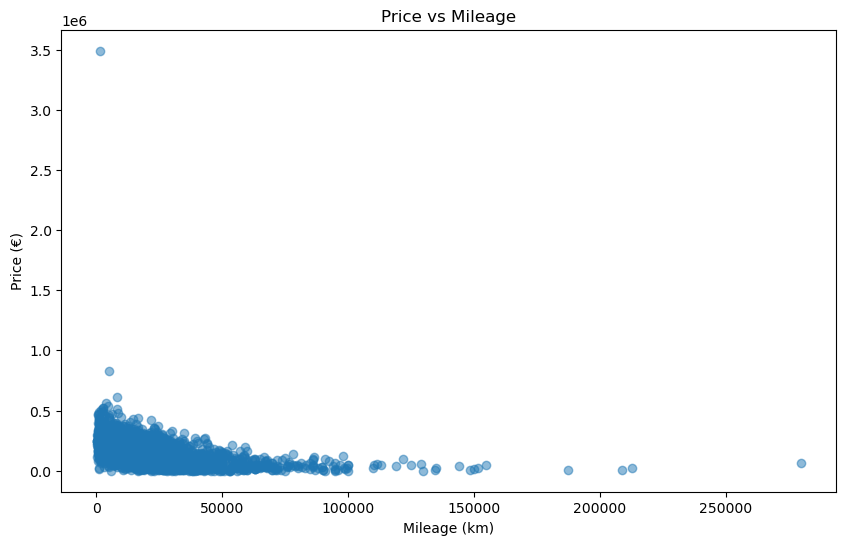

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['mileage'], alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (€)')
plt.show()


In [145]:
from datetime import datetime

df = df[df['registration_year'].str[:4].str.isnumeric()]
df['registration_year'] = df['registration_year'].str[:4].astype(int)

now = datetime.now().year
df['age'] = now - df['registration_year']
print(df)

           brand             model  price               seller  \
0            BMW    428 Gran Coupe  18000  Privatus pardavėjas   
1            BMW               530  26900  Privatus pardavėjas   
2     Volkswagen              Golf   7100  Privatus pardavėjas   
3           Fiat              500X  10500  Privatus pardavėjas   
4            BMW  320 Gran Turismo  14500  Privatus pardavėjas   
...          ...               ...    ...                  ...   
3749        Opel            Meriva   2850           Pardavėjas   
3893         BMW               318   2800           Pardavėjas   
3944        Opel            Meriva   2850           Pardavėjas   
5921      Toyota             Auris   2890       AUTOLYGIS, UAB   
5922     Hyundai          Santa Fe   2895           Pardavėjas   

                  location         phone  registration_year   mileage  \
0        Klaipėda, Lietuva  +37068744028               2015  199000.0   
1        Klaipėda, Lietuva  +37067780732               2019  

In [8]:
from datetime import datetime
from dateutil import parser


def extract_year(date_str):
    try:
        return parser.parse(date_str).year
    except (ValueError, TypeError):
        return None 

df['registration_year'] = df['registration_year'].apply(extract_year).astype('Int64')

df = df.dropna(subset=['registration_year'])

current_year = datetime.now().year
df['age'] = current_year - df['registration_year']

print(df)

           brand             model  price               seller  \
0            BMW    428 Gran Coupe  18000  Privatus pardavėjas   
1            BMW               530  26900  Privatus pardavėjas   
2     Volkswagen              Golf   7100  Privatus pardavėjas   
3           Fiat              500X  10500  Privatus pardavėjas   
4            BMW  320 Gran Turismo  14500  Privatus pardavėjas   
...          ...               ...    ...                  ...   
3749        Opel            Meriva   2850           Pardavėjas   
3893         BMW               318   2800           Pardavėjas   
3944        Opel            Meriva   2850           Pardavėjas   
5921      Toyota             Auris   2890       AUTOLYGIS, UAB   
5922     Hyundai          Santa Fe   2895           Pardavėjas   

                  location         phone  registration_year   mileage  \
0        Klaipėda, Lietuva  +37068744028               2015  199000.0   
1        Klaipėda, Lietuva  +37067780732               2019  

In [148]:
df['kw'] = df['engine'].str.extract(r'\((\d+)kW\)')

df['kw'] = pd.to_numeric(df['kw'], errors='coerce')


print(df)

           brand             model  price               seller  \
0            BMW    428 Gran Coupe  18000  Privatus pardavėjas   
1            BMW               530  26900  Privatus pardavėjas   
2     Volkswagen              Golf   7100  Privatus pardavėjas   
3           Fiat              500X  10500  Privatus pardavėjas   
4            BMW  320 Gran Turismo  14500  Privatus pardavėjas   
...          ...               ...    ...                  ...   
3749        Opel            Meriva   2850           Pardavėjas   
3893         BMW               318   2800           Pardavėjas   
3944        Opel            Meriva   2850           Pardavėjas   
5921      Toyota             Auris   2890       AUTOLYGIS, UAB   
5922     Hyundai          Santa Fe   2895           Pardavėjas   

                  location         phone  registration_year   mileage  \
0        Klaipėda, Lietuva  +37068744028               2015  199000.0   
1        Klaipėda, Lietuva  +37067780732               2019  

In [ ]:

st.subheader("Price vs Body type Scatter Plot")
fig, ax = plt.subplots()
ax.scatter(df['price'], df['body_type'], alpha=0.5)
ax.set_title('Price vs Body type')
ax.set_xlabel('Body type')
ax.set_ylabel('Price (€)')
st.pyplot(fig)

DeltaGenerator()

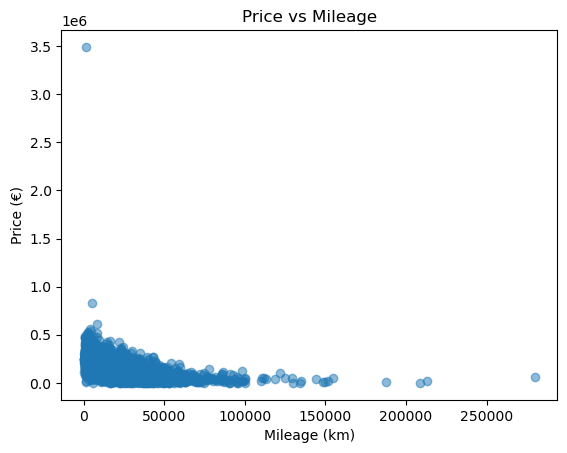

In [7]:
import streamlit as st


st.title("Car Listings Analysis")
st.dataframe(df)


st.subheader("Price vs Mileage Scatter Plot")
fig, ax = plt.subplots()
ax.scatter(df['price'], df['mileage'], alpha=0.5)
ax.set_title('Price vs Mileage')
ax.set_xlabel('Mileage (km)')
ax.set_ylabel('Price (€)')
st.pyplot(fig)


In [48]:
print(df['transmission'].value_counts())

Series([], Name: count, dtype: int64)


In [56]:
df['transmission'] = df['transmission'].str.strip().str.lower()


valid_transmissions = ['mechaninė', 'automatinė']
df = df[df['transmission'].isin(valid_transmissions)]


print(df['transmission'].value_counts())

transmission
automatinė    2498
mechaninė     1050
Name: count, dtype: int64


In [96]:
df['tech_check'] = df['tech_check'].astype(str).str[4:].str.strip()
df = df[df['tech_check'] != '']
df['tech_check'] = df['tech_check'].astype(int)
print(df['tech_check'].head())
print(df['tech_check'].value_counts())

1    -7
3   -10
4    -9
6   -10
7    -7
Name: tech_check, dtype: int32
tech_check
-9     378
-10    357
-8     280
-7     236
-6     211
-5     197
-4     170
-3     146
-11    123
-12    122
-2     116
-1     108
Name: count, dtype: int64


In [97]:
tech_check_count = df[df['tech_check'] != ''].shape[0]

print(f"Number of car announcements with tech checks: {tech_check_count}")

Number of car announcements with tech checks: 2444


In [100]:
# tech_check_yes = []
# tech_check_no = []
# for i in df['tech_check']:
#     if i is not None:
#         tech_check_yes.append(i)
#     else:
#         tech_check_no.append(i)

df['has_tech_check'] = df['tech_check'].notnull()
tech_check_yes = df[df['has_tech_check'] == True].shape[0]
tech_check_no = df[df['has_tech_check'] == False].shape[0]
print(df['has_tech_check'].value_counts())

st.subheader("Price vs TC Scatter Plot")
fig, ax = plt.subplots()
ax.scatter(df['price'], df['has_tech_check'], alpha=0.5)
ax.set_title('Price vs TC')
ax.set_xlabel('TC')
ax.set_ylabel('Price (€)')
st.pyplot(fig)

has_tech_check
True    2444
Name: count, dtype: int64


DeltaGenerator()

In [101]:
df['has_tech_check'] = df['tech_check'].notna().astype(int)


df = df.dropna(subset=['price'])


correlation = df['price'].corr(df['has_tech_check'])


st.title("Price vs Technical Check (TA) Correlation")
st.write(f"Correlation between Price and having Technical Check (TA): {correlation:.2f}")


fig, ax = plt.subplots()
ax.boxplot([df[df['has_tech_check'] == True]['price'], df[df['has_tech_check'] == False]['price']],
           labels=['With TA', 'Without TA'])

ax.set_title('Price Distribution by Technical Check Status')
ax.set_ylabel('Price (€)')


st.pyplot(fig)

c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


DeltaGenerator()

In [103]:
df['has_tech_check'] = df['tech_check'].notna().astype(int)

df = df.dropna(subset=['price'])

avg_price_with_ta = df[df['has_tech_check'] == 1]['price'].mean()
avg_price_without_ta = df[df['has_tech_check'] == 0]['price'].mean()

st.subheader("Impact of Technical Check (TA) on Car Prices")
st.write(f"Average price with TA: €{avg_price_with_ta:.2f}")
st.write(f"Average price without TA: €{avg_price_without_ta:.2f}")

fig, ax = plt.subplots()
ax.bar(['With TA', 'Without TA'], [avg_price_with_ta, avg_price_without_ta], color=['green', 'red'])
ax.set_title('Average Price by Technical Check Status')
ax.set_ylabel('Average Price (€)')

st.pyplot(fig)


DeltaGenerator()

In [108]:

top_10_brands = df['brand'].value_counts().head(10).index
df_top_brands = df[df['brand'].isin(top_10_brands)]

avg_price_per_mileage = df_top_brands.groupby('brand').apply(lambda x: x['price'].mean() / x['mileage'].mean())

st.write("Average Price per Mileage for Top 10 Brands:")
st.write(avg_price_per_mileage)

fig, ax = plt.subplots(figsize=(10, 6))
avg_price_per_mileage.plot(kind='bar', ax=ax)
ax.set_title('Average Price per Mileage for Top 10 Brands')
ax.set_xlabel('Brand')
ax.set_ylabel('Average Price per Mileage (€ per km)')
st.pyplot(fig)


DeltaGenerator()

In [109]:
import streamlit as st
import matplotlib.pyplot as plt


df_top_10_brands = df[df['brand'].isin(top_10_brands)]


st.subheader("Impact of Age on Price for Top 10 Most Popular Brands")
fig, ax = plt.subplots()
ax.scatter(df_top_10_brands['age'], df_top_10_brands['price'], alpha=0.5)
ax.set_title('Price vs Age for Top 10 Most Popular Brands')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Price (€)')
st.pyplot(fig)

C:\Users\Batia\AppData\Local\Temp\ipykernel_38444\341342706.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


DeltaGenerator()

In [ ]:
df_top_10_brands = df[df['brand'].isin(top_10_brands)]


st.subheader("Impact of KW on Price for Top 10 Most Popular Brands")
fig, ax = plt.subplots()
ax.scatter(df_top_10_brands['kw'], df_top_10_brands['price'], alpha=0.5)
ax.set_title('KW vs Price for Top 10 Most Popular Brands')
ax.set_xlabel('KW')
ax.set_ylabel('Price (€)')
st.pyplot(fig)

In [111]:
correlations = df.groupby('brand').apply(lambda x: x[['price', 'mileage', 'age']].corr().iloc[0, 1:])
price_vs_mileage_corr = correlations['mileage']
price_vs_age_corr = correlations['age']


fastest_depreciation = price_vs_age_corr.idxmin()
best_value_retention = price_vs_age_corr.idxmax()


price_variation = df.groupby('brand')['price'].std()
most_variable_brand = price_variation.idxmax()


st.title("Car Value Retention and Price Variation Analysis")
st.write(f"**Fastest Depreciating Brand:** {fastest_depreciation}")
st.write(f"**Best Value Retention Brand:** {best_value_retention}")
st.write(f"**Most Variable Prices:** {most_variable_brand}")

# Plot: Price Variation by Brand
st.subheader("Price Variation by Brand")
fig, ax = plt.subplots(figsize=(10, 5))
price_variation.plot(kind='bar', ax=ax)
ax.set_title('Price Variation by Brand (Standard Deviation)')
ax.set_ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=45)
st.pyplot(fig)

DeltaGenerator()

In [118]:
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[(brand_counts > 5) & (brand_counts < 15)].index
df_rare_brands = df[df['brand'].isin(rare_brands)]

if not rare_brands.empty:
    st.title("Rare Car Brands (5 < x < 15 Listings)")
    st.write(df_rare_brands['brand'].value_counts())

    st.dataframe(df_rare_brands)
    
    st.subheader("Price Distribution of Rare Car Brands")
    fig, ax = plt.subplots()
    df_rare_brands.boxplot(column='price', by='brand', ax=ax)
    ax.set_title('Price Distribution by Rare Car Brands')
    ax.set_xlabel('Brand')
    ax.set_ylabel('Price (€)')
    st.pyplot(fig)


In [120]:
top_10_brands = df['brand'].value_counts().head(10).index


df_top_brands = df[df['brand'].isin(top_10_brands)]


st.header("Engine Power Distribution for Top 10 Popular Brands")


fig, ax = plt.subplots(figsize=(12, 6))
df_top_brands.boxplot(column='kw', by='brand', ax=ax, showfliers=False)


means = df_top_brands.groupby('brand')['kw'].mean()
means.plot(style='ro', markersize=5, ax=ax, label='Mean (Vidurkis)')
# df_top_brands.boxplot(column='kw', by='brand', ax=ax)
ax.set_title('Distribution of Engine Power (kW) by Brand')
ax.set_xlabel('Brand')
ax.set_ylabel('Engine Power (kW)')
plt.suptitle('')  
plt.xticks(rotation=45)

st.pyplot(fig)

DeltaGenerator()

In [125]:

top_10_brands = df['brand'].value_counts().head(10).index

df_top_brands = df[df['brand'].isin(top_10_brands)]
print(top_10_brands)
print(df_top_brands)
st.header("Mileage Distribution for Top 10 Popular Brands")

fig, ax = plt.subplots(figsize=(12, 6))
df_top_brands.boxplot(column='mileage', by='brand', ax=ax, showfliers=False)
means = df_top_brands.groupby('brand')['mileage'].mean().reindex(top_10_brands)
means.plot(style='ro', markersize=5, ax=ax, label='Mean (Vidurkis)')

ax.set_title('Mileage Distribution by Brand (Top 10 Brands)')
ax.set_xlabel('Brand')
ax.set_ylabel('Mileage (km)')
plt.suptitle('')  
plt.xticks(rotation=45)

st.pyplot(fig)

Index(['BMW', 'Volkswagen', 'Toyota', 'Audi', 'Mercedes-Benz', 'Volvo',
       'Skoda', 'Opel', 'Lexus', 'Porsche'],
      dtype='object', name='brand')
           brand             model  price               seller  \
1            BMW               530  26900  Privatus pardavėjas   
4            BMW  320 Gran Turismo  14500  Privatus pardavėjas   
7            BMW               520   4000  Privatus pardavėjas   
8     Volkswagen            Amarok  13500  UAB RAPID SOLUTIONS   
11           BMW               530  48500  Privatus pardavėjas   
...          ...               ...    ...                  ...   
3721         BMW               530   2850           Pardavėjas   
3725  Volkswagen            Touran   2850           Pardavėjas   
3749        Opel            Meriva   2850           Pardavėjas   
3944        Opel            Meriva   2850           Pardavėjas   
5921      Toyota             Auris   2890       AUTOLYGIS, UAB   

                  location         phone  registration

DeltaGenerator()

In [126]:
top_10_brands = df['brand'].value_counts().head(10).index


df_top_brands = df[df['brand'].isin(top_10_brands)]

st.title("Age Distribution for Top 10 Popular Car Brands")

 
fig, ax = plt.subplots(figsize=(12, 6))
df_top_brands.boxplot(column='age', by='brand', ax=ax, showfliers=False)


means = df_top_brands.groupby('brand')['age'].mean()
means.plot(style='ro', markersize=5, ax=ax, label='Mean (Vidurkis)')


ax.set_title('Age Distribution by Brand (Top 10 Brands)')
ax.set_xlabel('Brand')
ax.set_ylabel('Age (Years)')
plt.suptitle('')  
plt.xticks(rotation=45)  

st.pyplot(fig)

DeltaGenerator()

In [149]:
valid_fuel_types = ['elektra', 'benzinas-elektra', 'dujos-elektra', 'benzinas-dujos-elektra', 'dizelinas-elektra']
pattern = '|'.join(valid_fuel_types)
df_electric = df[df['fuel_type'].str.contains(pattern, case=False, na=False)]


df_electric = df_electric.dropna(subset=['price', 'kw'])


correlation = df_electric['price'].corr(df_electric['kw'])


st.title("Price vs Electric Motor Power (kW)")
st.write(f"Correlation between Price and kW: {correlation:.2f}")

# Plot: Price vs kW
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_electric['kw'], df_electric['price'], alpha=0.6)
ax.set_title('Price vs Electric Motor Power (kW)')
ax.set_xlabel('Motor Power (kW)')
ax.set_ylabel('Price (€)')
st.pyplot(fig)

DeltaGenerator()

In [138]:
print(df['fuel_type'].value_counts())

fuel_type
Dyzelinas                     1836
Benzinas                      1137
Benzinas / elektra             486
Elektra                        171
Benzinas / dujos                53
Dyzelinas / elektra             34
                                 5
Benzinas / elektra / dujos       4
Name: count, dtype: int64


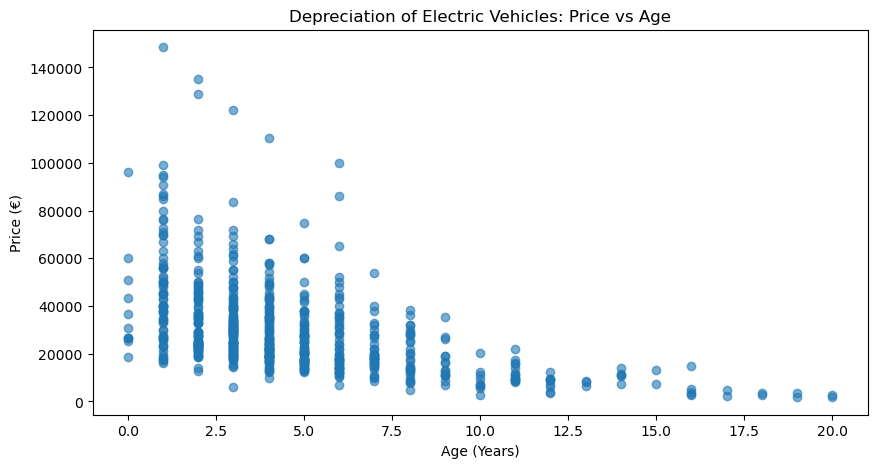

In [9]:
valid_fuel_types = ['elektra', 'benzinas-elektra', 'dujos-elektra', 'benzinas-dujos-elektra', 'dizelinas-elektra']
pattern = '|'.join(valid_fuel_types)
df_electric = df[df['fuel_type'].str.contains(pattern, case=False, na=False)]


df_electric = df_electric.dropna(subset=['price', 'age'])


st.header("Electric Vehicle Depreciation Rate")

# Scatter plot: Price vs Age (Depreciation trend)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_electric['age'], df_electric['price'], alpha=0.6)
ax.set_title('Depreciation of Electric Vehicles: Price vs Age')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Price (€)')

st.pyplot(fig)

correlation = df_electric['price'].corr(df_electric['age'])
st.write(f"Correlation between Age and Price: {correlation:.2f}")

In [11]:
import time
import sqlite3
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import streamlit as st
import matplotlib.pyplot as plt


# what is the  

DeltaGenerator()